# Домашнее задание по работе с OpenCV на языке Python

__Цель задания:__ Ознакомиться с базовыми методами библиотеки OpenCV для обработки изображений и видео.

### Импорт библиотек

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## Задание 1: Загрузка и отображение изображения

### Описание:
* Загрузите цветное изображение из файла.
* Отобразите изображение в отдельном окне.
* Дождитесь нажатия любой клавиши для закрытия окна.
### Подсказки:
* Используйте функции cv2.imread(), cv2.imshow(), cv2.waitKey(), cv2.destroyAllWindows().

In [2]:
# Загружаем изображение
image = cv2.imread('ship.jpg')
image = cv2.resize(image, (0,0), None, 0.5, 0.5)

# Проверка успешности чтения изображения
if image is None:
    print("Ошибка чтения изображения!")
    
# Отображаем изображение в отдельном окне
cv2.imshow('Some ship', image)

# Команда для ожидания нажатия клавиши
cv2.waitKey(0)

# Используем команду для закрытия всех окон после нажатия клавиши
cv2.destroyAllWindows()

## Задание 2: Конвертация изображения в оттенки серого

### Описание:
* Загрузите цветное изображение.
* Преобразуйте его в градиент серого.
* Отобразите оригинальное и преобразованное изображения рядом.
### Подсказки:
* Используйте функцию cv2.cvtColor() с флагом cv2.COLOR_BGR2GRAY.
* Для отображения нескольких изображений можно использовать библиотеки matplotlib или создать новое окно с объединенным изображением.

__Загрузка изображения и работа по его преобразованию__

In [3]:
# Загружаем изображение
image = cv2.imread('ship.jpg')

# Уменьшаем изображение для более оптимального отображения
image = cv2.resize(image, (0, 0), None, .5, .5)

# Преобразуем изображение в градиент серого
grey_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Преобразуем последовательность каналов изображение BGR в RGB
# для корректного отображения в matplotlib
color_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Преобразуем одноканальное изображение в оттенках серого
# в трехканальное, чтобы "склеить" цветное и серое изображения
grey_img_3_ch = cv2.cvtColor(grey_img, cv2.COLOR_GRAY2BGR)

__Вывод с помощью matplotlib__

(np.float64(-0.5), np.float64(599.5), np.float64(363.5), np.float64(-0.5))

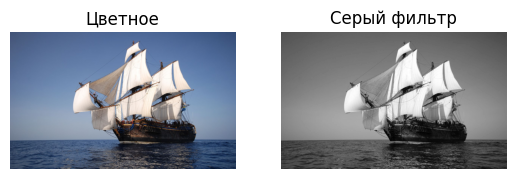

In [4]:
# Для вывода изображения используем библиотеку matplotlib
plt.subplot(1, 2, 1) # структукра вывода: 1 строка, два столбца, первое изображение 
plt.imshow(color_img) # вывод изображения
plt.title("Цветное") # название картинки
plt.axis('off') # отключаем оси

plt.subplot(1, 2, 2) # структукра вывода: 1 строка, два столбца, второе изображение 
plt.imshow(grey_img, cmap='gray') # вывод изображения в оттенках серого
plt.title("Серый фильтр") # название картинки
plt.axis('off') # отключаем оси

__Вывод с помощью Open CV__

In [5]:
# Объединяем массивы цветного и 3-хканального серго изображений в один массив
output_img = np.hstack((image, grey_img_3_ch))

# Отображаем объединенное изображение в отдельном окне
cv2.imshow("It's two ships", output_img)

# Команда для ожидания нажатия клавиши
cv2.waitKey(0)

# Используем команду для закрытия всех окон после нажатия клавиши
cv2.destroyAllWindows()

__Можно совместить по вертикали__

In [6]:
# Объединяем массивы цветного и 3-хканального серго изображений в один массив
output_img_vertical = np.vstack((image, grey_img_3_ch))

# Отображаем объединенное изображение в отдельном окне
cv2.imshow("It's ship under ship", output_img_vertical)

# Команда для ожидания нажатия клавиши
cv2.waitKey(0)

# Используем команду для закрытия всех окон после нажатия клавиши
cv2.destroyAllWindows()

## <a id='task_3'>Задание 3: Применение размытия Гаусса</a>

### Описание:
* Загрузите изображение в градиенте серого.
* Примените к нему размытие Гаусса.
* Отобразите результат.
### Подсказки:
* Функция размытия: cv2.GaussianBlur().
* Подберите параметры ядра размытия (например, (5, 5)).

In [7]:
# Применяем размытие Гаусса
gauss_img = cv2.GaussianBlur(grey_img, (7,7), 0)

# Отображаем изображение в отдельном окне
cv2.imshow('Размытие Гаусса', gauss_img)

cv2.waitKey(0)
cv2.destroyAllWindows()

## Задание 4: Обнаружение границ с помощью метода Кэнни

### Описание:
* На основе размытого изображения выполните обнаружение границ методом Кэнни.
* Отобразите исходное и полученное изображения.
### Подсказки:
* Используйте функцию cv2.Canny().
* Подберите пороги для метода Кэнни (например, 100 и 200).

In [9]:
import numpy as np 

# Применяем фильтр Canny к размытому изображению
cont_img = cv2.resize(gauss_img, (int(image.shape[1] * 0.5), int(image.shape[0] * 0.5)))

out_img = cv2.resize(grey_img, (int(image.shape[1] * 0.5), int(image.shape[0] * 0.5)))

filters = cv2.Canny(cont_img, 100, 200)

# Найдем границы
contours, _ = cv2.findContours(filters, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Нарисуем контуры на изображении
cv2.drawContours(cont_img, contours, -1, (0, 0, 0), 2)
cv2.imshow('Contours', cont_img)

cv2.waitKey(0)
cv2.destroyAllWindows()

# Выводим изображения рядом (еще один способ)
# concatenate image Horizontally 
Hori = np.concatenate((out_img, cont_img), axis=1) 

cv2.imshow('HORIZONTAL', Hori) 

cv2.waitKey(0)
cv2.destroyAllWindows()

## Задание 5: Рисование фигур и текста на изображении

### Описание:
* Создайте пустое цветное изображение (например, размером 512x512 пикселей).
* Нарисуйте на нем различные геометрические фигуры: линию, прямоугольник, круг.
* Добавьте текстовое сообщение.
* Отобразите результат.
### Подсказки:
* Создание изображения: numpy.zeros().
* Рисование фигур: cv2.line(), cv2.rectangle(), cv2.circle().
* Добавление текста: cv2.putText().

__Создадим пустое изображение и выведем его для просмотра__
* Это будет пустой массив numpy

In [10]:
# Высота и ширина изображения
height = 512
width = 512

# Создадим нулевой массив с указанными размерами, добавив размерность 3 (т.к. изображение цветное)
# также зададим формат unit8, позволяющий задвать значения массива от 0 до 255
canvas = np.zeros((height, width, 3), np.uint8)

# Преобразуем холст в белый
canvas[:,:] = (255, 255, 255)

# Отображаем изображение в отдельном окне
cv2.imshow('Canvas', canvas)

cv2.waitKey(0)
cv2.destroyAllWindows()

__Рисуем фигуры__

* Линии (диагонали) толщиной 5 и 10 пикселей, синего и и красного цвета, соответственно

In [11]:
cv2.line(canvas, (0,0), (511,511), (0,0,255), 5)
cv2.line(canvas, (0,511), (511,0), (255,0,0), 10)

# Отображаем изображение в отдельном окне
cv2.imshow('Lines', canvas)

cv2.waitKey(0)
cv2.destroyAllWindows()

* Прямоугольник толщиной 8 пикселей по границам изображения зеленого цвета

In [12]:
cv2.rectangle(canvas, (5,5), (506,506), (0,255,0), 9) # смещаем точки углов прямоугольника на половину толщины линии

# Отображаем изображение в отдельном окне
cv2.imshow('Rectangle', canvas)

cv2.waitKey(0)
cv2.destroyAllWindows()

* Окружность, полностью заштрихованная, (круг) в центре изображения радиусом 100 пикселей пурпурного цвета, 

In [13]:
cv2.circle(canvas,(int(512 /2), int(512 / 2)), 100, (255,0,255), -1)

# Отображаем изображение в отдельном окне
cv2.imshow('Circle', canvas)

cv2.waitKey(0)
cv2.destroyAllWindows()

* Добавим текстовое сообщение (шрифт FONT_HERSHEY_SIMPLEX, масштабом = 1, нижний левый угол - всередине изображения по высоте с отступом 15 пикселей от левого края), толщина линий = 2

In [14]:
font = cv2.FONT_HERSHEY_SIMPLEX
# параметр cv2.LINE_AA используется для лучшего отображения текста
cv2.putText(canvas,'Hello world! (of course!)', (15, int(512 / 2)), font, 1, (0,0,0), 2, cv2.LINE_AA)


# Отображаем изображение в отдельном окне
cv2.imshow('Rectangle', canvas)

cv2.waitKey(0)
cv2.destroyAllWindows()

## Задание 6: Захват видео с веб-камеры

### Описание:
* Настройте захват видео с веб-камеры.
* В реальном времени отображайте поток видео.
* Добавьте возможность выхода из программы при нажатии определенной клавиши (например, 'q').
### Подсказки:
* Используйте cv2.VideoCapture(0) для захвата видео.
* Отображение кадра в цикле: while True: ....
* Проверка нажатия клавиши: cv2.waitKey(1) & 0xFF == ord('q').

* Создадим экземпляр класса VideoCapture для поддержки захвата видео. Аргумент `0` используем для указания на встроенную камеру ноутбука

In [15]:
import cv2
cap = cv2.VideoCapture(0)

* Запускаем бесконечный цикл для постоянного захвата и отображения видео. Пока подается сигнал с видеокамеры - считываем его в созданный захватчик видео. В противном случае либо при нажатии клавиши 'q', прекращаем захват видео

In [16]:
while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    cv2.imshow('Videostream', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Освобождаем видеопоток от вебкамеры.
cap.release()
cv2.destroyAllWindows()

## Задание 7: Сохранение обработанного изображения

## Описание:
* Выполните любое из предыдущих заданий по обработке изображения.
* Сохраните полученное изображение в файл на диске.
## Подсказки:
* Используйте функцию cv2.imwrite().

__Сохраним полученное изображение output_img_vertical из [задания 3](#task_3)__

In [17]:
# Отображаем изображение в отдельном окне
cv2.imshow('Ship under ship', output_img_vertical)

cv2.waitKey(0)
cv2.destroyAllWindows()

# Сохраняем изображение в корневую папку
cv2.imwrite('saved_ships.jpg', output_img_vertical)

True

## Дополнительное задание (по желанию)

### Описание:
* Реализуйте программу, которая будет обнаруживать лица на изображении и обводить их прямоугольниками.
### Подсказки:
* Используйте каскады Хаара: загрузите предварительно обученный классификатор
haarcascade_frontalface_default.xml.
* Функции: cv2.CascadeClassifier(), detectMultiScale().

* Используем такое изображение

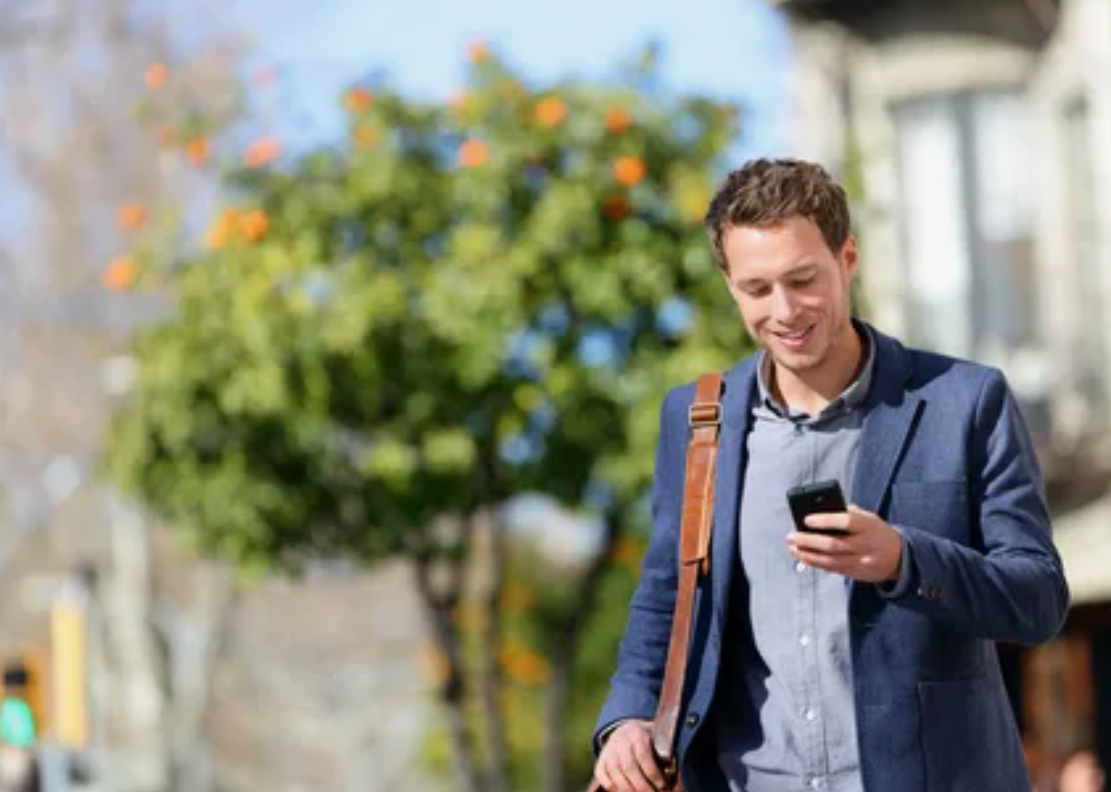

__Далее выполняем следующий алгоритм__

In [19]:
image_for_face = cv2.imread(r'man.jpg')
image_for_face = cv2.resize(image_for_face, (0, 0), None, .5, .5)

# Создание алгоритма для поиска лиц
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Преобразование изображения в оттенки серого
grey_image = cv2.cvtColor(image_for_face, cv2.COLOR_BGR2GRAY)

# Обнаружение лиц с помощью алгоритма Haar Cascades
faces = face_cascade.detectMultiScale(grey_image, scaleFactor=1.1, minNeighbors=5, minSize=(50, 50))

# Рисуем прямоугольники вокруг лиц
for (x, y, w, h) in faces:
    cv2.rectangle(image_for_face, (x, y), (x+w, y+h), (255, 0, 0), 2)

cv2.imshow('Detected Faces', image_for_face)

cv2.waitKey(0)
cv2.destroyAllWindows()

Ссылки на изображения:

[Изображение корабля](https://disk.yandex.ru/i/FOglJmGGSwqrIA)

[Результат задания 7](https://disk.yandex.ru/i/AGliTMcEUgVnjA)

[Изображение человека](https://disk.yandex.ru/i/tIc6QFQQz_vyfw)